# Table of Contents
* [Explore CARMENES Spectrum](#Explore-CARMENES-Spectrum)


# Explore CARMENES Spectrum

- Explore how to load CARMENES Spectra
- Splitting/verse correcting Telluric lines
- Try extract some precisions and compare to Reiners 2017 [1](#cite-reiners_carmenes_2017)

Using Barnard's star so can also compare to Artigau 2018 [2](#cite-artigau_optical_2018)

In [1]:
# Module to read data
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import numpy as np
from eniric.Qcalculator import quality

from astropy.io import fits

def tac_molecfit(filename):
    # Read result file after the fit over full wavelength range and
    # telluric correction (= division by the atmospheric transmission)
    # wavelengths (wl) in microns and vacuum
    hdu_molecfit = fits.open(filename)
    data_molecfit = hdu_molecfit[1].data
    wl_input = data_molecfit.field('lambda')
    wl_model = data_molecfit.field('mlambda')
    input_flux = data_molecfit.field('flux')
    corr_flux = data_molecfit.field('cflux')
    mtrans = data_molecfit.field('mtrans')
    weight = data_molecfit.field('weight')
    mweight = data_molecfit.field('mweight')
    qual = data_molecfit.field('qual')
    return wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight


def molecfit_fit(filename):
    # result file after the fit
    # in the fitting regions
    # Wl in microns and vacuum
    hdu_molecfit = fits.open(filename)
    data_molecfit = hdu_molecfit[1].data
    wl_input = data_molecfit.field('lambda')
    input_flux = data_molecfit.field('flux')
    weight = data_molecfit.field('weight')
    mrange = data_molecfit.field('mrange')
    wl_model = data_molecfit.field('mlambda')
    mscal = data_molecfit.field('mscal')
    mflux = data_molecfit.field('mflux')
    mweight = data_molecfit.field('mweight')
    dev = data_molecfit.field('dev')
    mtrans = data_molecfit.field('mtrans')
    return wl_input, input_flux, weight, mrange, wl_model, mscal, mflux, mweight, dev, mtrans


def TAC_molecfit(filename):
    # Read file TAC
    # the wavelength are in the original format
    # ------------------------------------------
    hdu = fits.open(filename)
    header = hdu[1].header
    name = os.path.basename(filename)
    wl = hdu[1].data.field('WAVE')
    input_flux = hdu[1].data.field('SPEC')
    input_cont = hdu[1].data.field('CONT')
    input_error = hdu[1].data.field('SIG')
    corr_flux = hdu[1].data.field('tacflux')
    mtrans = hdu[1].data.field('mtrans')
    qual = hdu[1].data.field('tacqual')
    return name, header, wl*0.001, input_flux, input_cont, input_error, corr_flux, mtrans, qual



/home/jneal/Phd/Codes/eniric/eniric/__init__.py:20: UserWarning: Using the default config.yaml file located at /home/jneal/Phd/Codes/eniric/eniric/config.yaml. This is likely NOT what you want. Please create a similar 'config.yaml' file in your current working directory.
  "'config.yaml' file in your current working directory.".format(default), UserWarning)


In [2]:
def log_chunks(wavelength, percent):
    """Define bounds at which $(Delta \lambda)/\lambda = X\%$"""
    base = 1 + percent/100
    n = np.log(wavelength[-1]/wavelength[0]) / np.log(base)
    powers = np.arange(np.ceil(n))
    
    return wavelength[0] * base ** powers


In [3]:
path = "/home/jneal/Phd/Collaborations/Carmenes-correction/barnard_star"
import os
os.chdir(path)


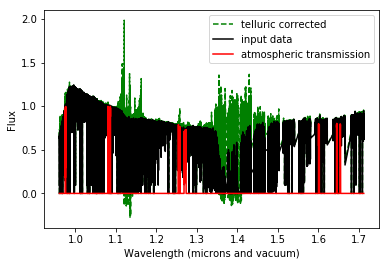

In [4]:
# Load spectrum example
file0 = 'car-20160325T05h28m38s'
filename = 'output/' + file0 + '-sci-gtoc-nir_A_tell_tac.fits'
filename2 = 'output/' + file0 + '-sci-gtoc-nir_A_tell_fit.fits'
filename3 = 'output/' + 'car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits'
wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight = tac_molecfit(filename)
plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')
wl_input, input_flux, weight, mrange, wl_model, mscal, mflux, mweight, dev, mtrans = molecfit_fit(filename2)
plt.plot(wl_input, mtrans*mscal, 'r-', label='atmospheric transmission')
plt.xlabel('Wavelength (microns and vacuum)')
plt.ylabel('Flux')
plt.legend()
plt.show()

name, header, wl, input_flux, input_cont, input_error, corr_flux, mtrans, qual = TAC_molecfit(filename3)


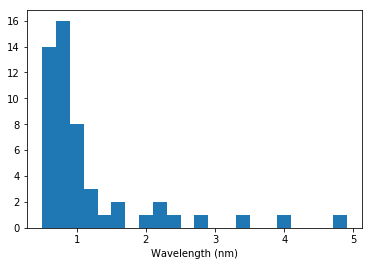

In [5]:
# Load tac.fits spectrum
wl_input, wl_model, input_flux, corr_flux, mtrans, qual, weight, mweight = tac_molecfit(filename)

# Using corr flux
assert np.all(qual >=0)
assert np.all(qual <=1)

cut_wl = wl_input[np.where(qual)]
wl_diff = np.diff(cut_wl) * 1e3  # nanometer
len(wl_diff)
plt.hist(wl_diff, bins=np.arange(0.5, 5, .2))
plt.xlabel("Wavelength (nm)")

big_gaps = np.where(wl_diff > 1.5)


blue lines indicate start of 1nm gaps


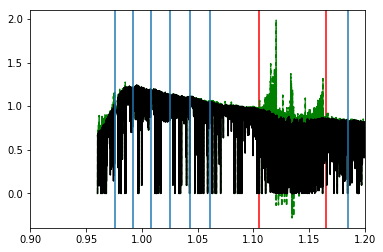

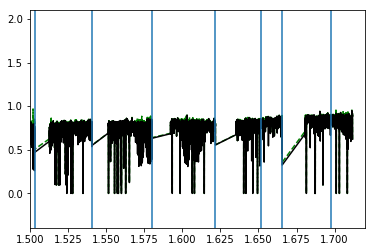

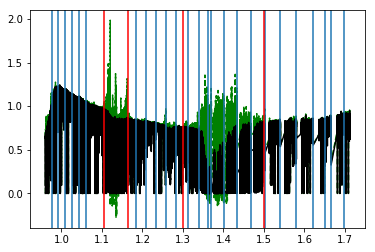

In [6]:
# 
gap = 1 # nanometer 
print("blue lines indicate start of {}nm gaps".format(gap))
big_gaps = np.where(wl_diff > 1)  # nanometer

# Cuts for poor correction
cut1 = [1.105, 1.165]
cut2 = [1.3, 1.5]

for line in cut1:
    plt.axvline(line, color="red")
plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')
for line in cut_wl[big_gaps]:
    plt.axvline(line)
plt.xlim((0.9,1.2))
plt.show()

plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')
for line in cut_wl[big_gaps]:
    plt.axvline(line)
plt.xlim((1.5,1.72))
plt.show()



plt.plot(wl_input, corr_flux, 'g--', label='telluric corrected')
plt.plot(wl_input, input_flux, 'k-', label='input data')
for line in cut_wl[big_gaps]:
    plt.axvline(line)
for line in cut1:
    plt.axvline(line, color="red")
for line in cut2:
    plt.axvline(line, color="red")
plt.show()

# Spectral Quality 

In [7]:
from eniric.Qcalculator import quality
# Naive Q
naive_q_uncorrected = quality(wl_input[np.where(qual)], input_flux[np.where(qual)])
print("naive_q", naive_q_uncorrected)

# Telluric corrected spectra decreases in quality (less lines)
naive_q_corrected = quality(wl_input[np.where(qual)], corr_flux[np.where(qual)])
print("naive_corrected_q", naive_q_corrected)

naive_q 16358.660181290534
naive_corrected_q 13785.750274389284


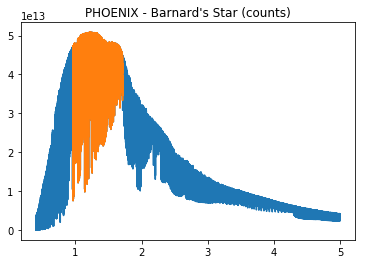

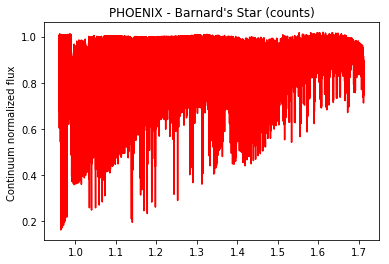

In [8]:
# Phoenix spectrum of barnards star (Artigau 2018)
Phoniex_path = os.path.join("/home", "jneal", "Phd", "data", "PHOENIX-ALL","PHOENIX")
wav = fits.getdata(os.path.join(Phoniex_path, "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"))

# Barnards star
data = fits.getdata(os.path.join(Phoniex_path, "Z-0.5", "lte03200-5.00-0.5.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"))
wav = wav/10000  # micrometers

data *= wav  # approx Transform to counts

mask = (wav >= wl_input[0]) & (wav <= wl_input[-1])

wav2 = wav[mask]
data2 = data[mask]

mask3 = (wav >= 0.4) & (wav <= 5)
wav3 = wav[mask3]
data3 = data[mask3]

plt.plot(wav3, data3)
plt.plot(wav2, data2)
plt.title("PHOENIX - Barnard's Star (counts)")
plt.show()
from spectrum_overload.spectrum import Spectrum

continuum2 = Spectrum(xaxis=wav2, flux=data2).continuum(method="cubic")
data2 = data2/continuum2.flux


continuum3 = Spectrum(xaxis=wav3, flux=data3).continuum(method="cubic")
data3 = data3/continuum3.flux

#plt.plot(wav3, data3, label="3")
plt.plot(wav2, data2, "r")
plt.title("PHOENIX - Barnard's Star (counts)")
plt.ylabel("Continuum normalized flux ")
plt.show()

In [9]:
## Artigau 2018 % slicing

len chunks 1265
diff chunks/wav [0.002 0.002 0.002 0.002 0.002]


/home/jneal/anaconda3/envs/eniric/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jneal/Phd/Codes/eniric/eniric/Qcalculator.py:173: UserWarning: Weight sum is not finite
  warnings.warn("Weight sum is not finite")


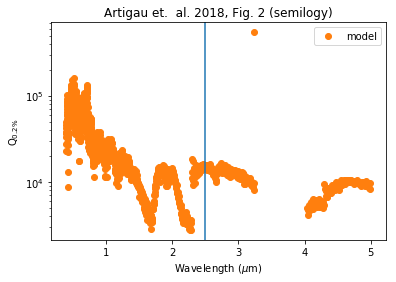

In [10]:
# Slices of given Delta lambda/lambda

# Break into small chunks 0.2%  (delta lambda)/lambda
chunks = log_chunks(wav3, 0.2)

print( "len chunks", len(chunks))
print("diff chunks/wav", (np.diff(chunks)/chunks[:-1])[:5])
# Artigau turn it into 0.2% chunks in which  $(\Delta \lambda) / lambda$ = 0.2% 

ph_qual = []
center = []
for ii in range(len(chunks)-1):
    xmin = chunks[ii]
    xmax = chunks[ii+1]

    this_center = (xmax + xmin)/2
    center.append(this_center)
    m = (wav3 <= xmax) & (wav3 >= xmin)
    ph_qual.append(quality(wav3[m], data3[m]))

plt.semilogy(center, ph_qual, "o", label="model", color="C1")
plt.legend()
plt.axvline(2.5)
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel(r"Q$_{0.2\%}$")
plt.title("Artigau et.  al. 2018, Fig. 2 (semilogy)")
plt.show()

In [11]:
# With CARMENES
# mask out where qual is zero but use original wal_input to create chunks.
wl_input_qual = wl_input[np.where(qual)]
corr_flux_qual = corr_flux[np.where(qual)]

carm_chunks = log_chunks(wl_input, 25)

carm_qual = []
carm_center = []

for ii in range(len(carm_chunks)-1):
    xmin = carm_chunks[ii]
    xmax = carm_chunks[ii+1]

    this_center = (xmax + xmin) / 2
    carm_center.append(this_center)
    m = (wl_input_qual <= xmax) & (wl_input_qual >= xmin)
    print(ii)
    print(xmin, xmax)
    print("mask", m)
    print("sum mask", sum(m))
    print("wl",wl_input_qual[m])
    print("corr",corr_flux_qual[m])
    quality_ = quality(wl_input_qual[m], corr_flux_qual[m])
    print("quality = ",quality_)
    carm_qual.append(quality(wl_input_qual[m], corr_flux_qual[m]))
    

0
0.9603571893764767 1.200446486720596
mask [ True  True  True ... False False False]
sum mask 45258
wl [0.96036786 0.9603732  0.96037853 ... 1.20043533 1.20044036 1.20044538]
corr [0.49637562 0.54979082 0.62437076 ... 0.80264495 0.80171829 0.8071856 ]
quality =  15115.613300427938
1
1.200446486720596 1.5005581084007449
mask [False False False ... False False False]
sum mask 38504
wl [1.2004504  1.20045542 1.20046044 ... 1.50054351 1.50054872 1.50055393]
corr [0.80797436 0.80273851 0.79524406 ... 0.78795623 0.81132555 0.82043007]
quality =  12497.928136980006


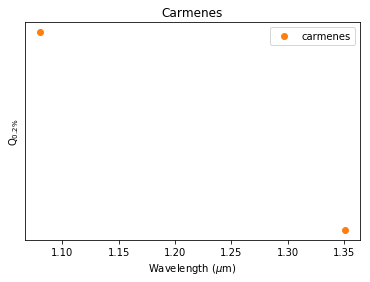

In [12]:

plt.semilogy(carm_center, carm_qual, "o", label="carmenes", color="C1")
plt.legend()
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel(r"Q$_{0.2\%}$")
plt.title("Carmenes")
plt.show()
# print(carm_center)
# print(carm_qual)

/home/jneal/anaconda3/envs/eniric/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


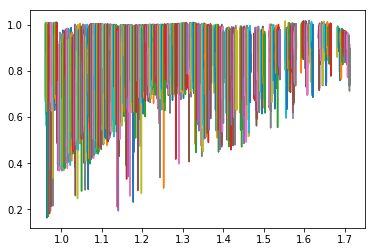

In [13]:
# PHOENIX interpolated to CARMENES wavelengths
phoenix_carmenes = np.interp(wl_input, wav2, data2)

carm_ph_qual = []
carm_ph_center = []

for ii in range(len(chunks)-1):
    xmin = chunks[ii]
    xmax = chunks[ii+1]

    this_center = (xmax + xmin)/2
    carm_ph_center.append(this_center)
    m = (wl_input <= xmax) & (wl_input >= xmin)
    
    carm_ph_qual.append(quality(wl_input[m], phoenix_carmenes[m]))
    plt.plot(wl_input[m], phoenix_carmenes[m], label=quality(wl_input[m], phoenix_carmenes[m]))
plt.show()

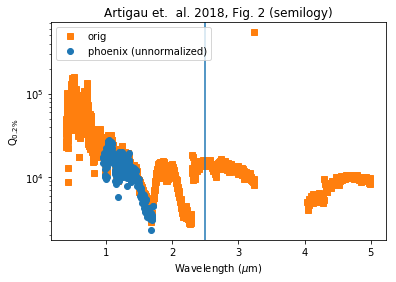

In [14]:

plt.semilogy(center, ph_qual, "s", label="orig", color="C1")
plt.semilogy(carm_ph_center, carm_ph_qual, "o", label="phoenix (unnormalized)", color="C0")
plt.legend()
plt.axvline(2.5)
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel(r"Q$_{0.2\%}$")
plt.title("Artigau et.  al. 2018, Fig. 2 (semilogy)")
plt.show()

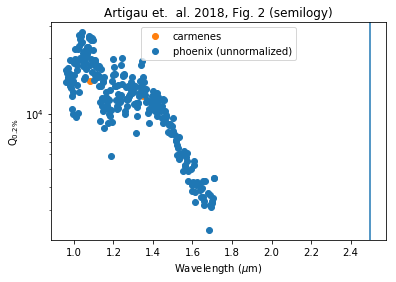

In [15]:
plt.semilogy(carm_center, carm_qual, "o", label="carmenes", color="C1")

plt.semilogy(carm_ph_center, carm_ph_qual, "o", label="phoenix (unnormalized)", color="C0")

plt.legend()
plt.axvline(2.5)
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel(r"Q$_{0.2\%}$")
plt.title("Artigau et.  al. 2018, Fig. 2 (semilogy)")
plt.show()

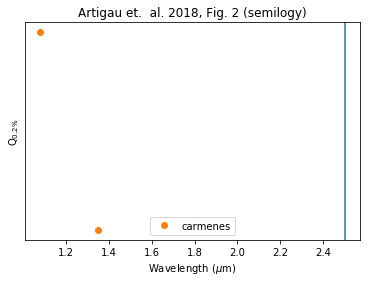

In [16]:

plt.semilogy(carm_center, carm_qual, "o", label="carmenes", color="C1")

#plt.semilogy(carm_ph_center, carm_ph_qual, "o", label="phoenix (unnormalized)", color="C0")

plt.legend()
plt.axvline(2.5)
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel(r"Q$_{0.2\%}$")
plt.title("Artigau et.  al. 2018, Fig. 2 (semilogy)")
plt.show()

In [17]:
<!--bibtex
@article{bouchy_fundamental_2001,
  title = {Fundamental Photon Noise Limit to Radial Velocity Measurements},
  volume = {374},
  issn = {0004-6361, 1432-0756},
  doi = {10.1051/0004-6361:20010730},
  number = {2},
  journal = {Astronomy and Astrophysics},
  author = {Bouchy, F. and Pepe, F. and Queloz, D.},
  month = aug,
  year = {2001},
  pages = {733-739},
  file = {/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/UGSFCJ25/aa1316.pdf},
  note = {00258}
}

@article{artigau_optical_2018,
  archivePrefix = {arXiv},
  eprinttype = {arxiv},
  eprint = {1803.07646},
  title = {Optical and {{Near}}-{{Infrared Radial Velocity Content}} of {{M Dwarfs}}: {{Testing Models}} with {{Barnard}}'s {{Star}}},
  volume = {155},
  issn = {1538-3881},
  shorttitle = {Optical and {{Near}}-{{Infrared Radial Velocity Content}} of {{M Dwarfs}}},
  doi = {10/gddxj4},
  number = {5},
  journal = {The Astronomical Journal},
  author = {Artigau, {\'E}tienne and Malo, Lison and Doyon, Ren{\'e} and Figueira, Pedro and Delfosse, Xavier and Astudillo-Defru, Nicola},
  month = apr,
  year = {2018},
  keywords = {Astrophysics - Instrumentation and Methods for Astrophysics,Astrophysics - Solar and Stellar Astrophysics},
  pages = {198},
  file = {/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/7FULJUP6/Artigau et al_2018_Optical and Near-Infrared Radial Velocity Content of M Dwarfs.pdf;/home/jneal/.mozilla/firefox/2rcitvnq.default/zotero/storage/VXVUZDVW/1803.html}
}

@article{reiners_carmenes_2017,
  title = {The {{CARMENES}} Search for Exoplanets around {{M}} Dwarfs: {{High}}-Resolution Optical and near-Infrared Spectroscopy of 324 Survey Stars},
  volume = {1711},
  shorttitle = {The {{CARMENES}} Search for Exoplanets around {{M}} Dwarfs},
  journal = {ArXiv e-prints},
  author = {Reiners, A. and Zechmeister, M. and Caballero, J. A. and Ribas, I. and Morales, J. C. and Jeffers, S. V. and Sch{\"o}fer, P. and Tal-Or, L. and Quirrenbach, A. and Amado, P. J. and Kaminski, A. and Seifert, W. and Abril, M. and Aceituno, J. and Alonso-Floriano, F. J. and Ammler-von Eiff, M. and Antona, R. and Anglada-Escud{\'e}, G. and Anwand-Heerwart, H. and Arroyo-Torres, B. and Azzaro, M. and Baroch, D. and Barrado, D. and Bauer, F. F. and Becerril, S. and B{\'e}jar, V. J. S. and Ben{\'\i}tez, D. and Berdi{\~n}as, Z. M. and Bergond, G. and Bl{\"u}mcke, M. and Brinkm{\"o}ller, M. and {del Burgo}, C. and Cano, J. and C{\'a}rdenas V{\'a}zquez, M. C. and Casal, E. and Cifuentes, C. and Claret, A. and Colom{\'e}, J. and Cort{\'e}s-Contreras, M. and Czesla, S. and D{\'\i}ez-Alonso, E. and Dreizler, S. and Feiz, C. and Fern{\'a}ndez, M. and Ferro, I. M. and Fuhrmeister, B. and Galad{\'\i}-Enr{\'\i}quez, D. and Garcia-Piquer, A. and Garc{\'\i}a Vargas, M. L. and Gesa, L. and G{\'o}mez, V. and {Galera} and Gonz{\'a}lez Hern{\'a}ndez, J. I. and Gonz{\'a}lez-Peinado, R. and Gr{\"o}zinger, U. and Grohnert, S. and Gu{\`a}rdia, J. and Guenther, E. W. and Guijarro, A. and {de Guindos}, E. and Guti{\'e}rrez-Soto, J. and Hagen, H.-J. and Hatzes, A. P. and Hauschildt, P. H. and Hedrosa, R. P. and Helmling, J. and Henning, Th. and Hermelo, I. and Hern{\'a}ndez Arab{\'\i}, R. and Hern{\'a}ndez Casta{\~n}o, L. and Hern{\'a}ndez Hernando, F. and Herrero, E. and Huber, A. and Huke, P. and Johnson, E. and {de Juan}, E. and Kim, M. and Klein, R. and Kl{\"u}ter, J. and Klutsch, A. and K{\"u}rster, M. and Lafarga, M. and Lamert, A. and Lamp{\'o}n, M. and Lara, L. M. and Laun, W. and Lemke, U. and Lenzen, R. and Launhardt, R. and {L{\'o}pez del Fresno}, M. and L{\'o}pez-Gonz{\'a}lez, J. and L{\'o}pez-Puertas, M. and L{\'o}pez Salas, J. F. and L{\'o}pez-Santiago, J. and Luque, R. and Mag{\'a}n Madinabeitia, H. and Mall, U. and Mancini, L. and Mandel, H. and Marfil, E. and Mar{\'\i}n Molina, J. A. and Maroto, D. and {Fern{\'a}ndez} and Mart{\'\i}n, E. L. and Mart{\'\i}n-Ruiz, S. and Marvin, C. J. and Mathar, R. J. and Mirabet, E. and Montes, D. and Moreno-Raya, M. E. and Moya, A. and Mundt, R. and Nagel, E. and Naranjo, V. and Nortmann, L. and Nowak, G. and Ofir, A. and Oreiro, R. and Pall{\'e}, E. and Panduro, J. and Pascual, J. and Passegger, V. M. and Pavlov, A. and Pedraz, S. and P{\'e}rez-Calpena, A. and P{\'e}rez Medialdea, D. and Perger, M. and Perryman, M. A. C. and Pluto, M. and Rabaza, O. and Ram{\'o}n, A. and Rebolo, R. and Redondo, P. and Reffert, S. and Reinhart, S. and Rhode, P. and Rix, H.-W. and Rodler, F. and Rodr{\'\i}guez, E. and Rodr{\'\i}guez-L{\'o}pez, C. and Rodr{\'\i}guez Trinidad, A. and Rohloff, R.-R. and Rosich, A. and Sadegi, S. and S{\'a}nchez-Blanco, E. and S{\'a}nchez Carrasco, M. A. and S{\'a}nchez-L{\'o}pez, A. and Sanz-Forcada, J. and Sarkis, P. and Sarmiento, L. F. and Sch{\"a}fer, S. and Schmitt, J. H. M. M. and Schiller, J. and Schweitzer, A. and Solano, E. and Stahl, O. and Strachan, J. B. P. and St{\"u}rmer, J. and Su{\'a}rez, J. C. and Tabernero, H. M. and Tala, M. and Trifonov, T. and Tulloch, S. M. and Ulbrich, R. G. and Veredas, G. and Vico Linares, J. I. and Vilardell, F. and Wagner, K. and Winkler, J. and Wolthoff, V. and Xu, W. and Yan, F. and Zapatero Osorio, M. R.},
  month = nov,
  year = {2017},
  keywords = {Astrophysics - Earth and Planetary Astrophysics,Astrophysics - Solar and Stellar Astrophysics},
  pages = {arXiv:1711.06576}
}

-->

SyntaxError: invalid syntax (<ipython-input-17-3c73a01e8b2d>, line 1)

# References

<a name="cite-reiners_carmenes_2017"/><sup>[^](#ref-1) </sup>Reiners, A. and Zechmeister, M. and Caballero, J. A. and Ribas, I. and Morales, J. C. and Jeffers, S. V. and Sch&ouml;fer, P. and Tal-Or, L. and Quirrenbach, A. and Amado, P. J. and Kaminski, A. and Seifert, W. and Abril, M. and Aceituno, J. and Alonso-Floriano, F. J. and Ammler-von Eiff, M. and Antona, R. and Anglada-Escud&eacute;, G. and Anwand-Heerwart, H. and Arroyo-Torres, B. and Azzaro, M. and Baroch, D. and Barrado, D. and Bauer, F. F. and Becerril, S. and B&eacute;jar, V. J. S. and Ben\'\itez, D. and Berdi&ntilde;as, Z. M. and Bergond, G. and Bl&uuml;mcke, M. and Brinkm&ouml;ller, M. and del Burgo, C. and Cano, J. and C&aacute;rdenas V&aacute;zquez, M. C. and Casal, E. and Cifuentes, C. and Claret, A. and Colom&eacute;, J. and Cort&eacute;s-Contreras, M. and Czesla, S. and D\'\iez-Alonso, E. and Dreizler, S. and Feiz, C. and Fern&aacute;ndez, M. and Ferro, I. M. and Fuhrmeister, B. and Galad\'\i-Enr\'\iquez, D. and Garcia-Piquer, A. and Garc\'\ia Vargas, M. L. and Gesa, L. and G&oacute;mez, V. and Galera and Gonz&aacute;lez Hern&aacute;ndez, J. I. and Gonz&aacute;lez-Peinado, R. and Gr&ouml;zinger, U. and Grohnert, S. and Gu&agrave;rdia, J. and Guenther, E. W. and Guijarro, A. and de Guindos, E. and Guti&eacute;rrez-Soto, J. and Hagen, H.-J. and Hatzes, A. P. and Hauschildt, P. H. and Hedrosa, R. P. and Helmling, J. and Henning, Th. and Hermelo, I. and Hern&aacute;ndez Arab\'\i, R. and Hern&aacute;ndez Casta&ntilde;o, L. and Hern&aacute;ndez Hernando, F. and Herrero, E. and Huber, A. and Huke, P. and Johnson, E. and de Juan, E. and Kim, M. and Klein, R. and Kl&uuml;ter, J. and Klutsch, A. and K&uuml;rster, M. and Lafarga, M. and Lamert, A. and Lamp&oacute;n, M. and Lara, L. M. and Laun, W. and Lemke, U. and Lenzen, R. and Launhardt, R. and L&oacute;pez del Fresno, M. and L&oacute;pez-Gonz&aacute;lez, J. and L&oacute;pez-Puertas, M. and L&oacute;pez Salas, J. F. and L&oacute;pez-Santiago, J. and Luque, R. and Mag&aacute;n Madinabeitia, H. and Mall, U. and Mancini, L. and Mandel, H. and Marfil, E. and Mar\'\in Molina, J. A. and Maroto, D. and Fern&aacute;ndez and Mart\'\in, E. L. and Mart\'\in-Ruiz, S. and Marvin, C. J. and Mathar, R. J. and Mirabet, E. and Montes, D. and Moreno-Raya, M. E. and Moya, A. and Mundt, R. and Nagel, E. and Naranjo, V. and Nortmann, L. and Nowak, G. and Ofir, A. and Oreiro, R. and Pall&eacute;, E. and Panduro, J. and Pascual, J. and Passegger, V. M. and Pavlov, A. and Pedraz, S. and P&eacute;rez-Calpena, A. and P&eacute;rez Medialdea, D. and Perger, M. and Perryman, M. A. C. and Pluto, M. and Rabaza, O. and Ram&oacute;n, A. and Rebolo, R. and Redondo, P. and Reffert, S. and Reinhart, S. and Rhode, P. and Rix, H.-W. and Rodler, F. and Rodr\'\iguez, E. and Rodr\'\iguez-L&oacute;pez, C. and Rodr\'\iguez Trinidad, A. and Rohloff, R.-R. and Rosich, A. and Sadegi, S. and S&aacute;nchez-Blanco, E. and S&aacute;nchez Carrasco, M. A. and S&aacute;nchez-L&oacute;pez, A. and Sanz-Forcada, J. and Sarkis, P. and Sarmiento, L. F. and Sch&auml;fer, S. and Schmitt, J. H. M. M. and Schiller, J. and Schweitzer, A. and Solano, E. and Stahl, O. and Strachan, J. B. P. and St&uuml;rmer, J. and Su&aacute;rez, J. C. and Tabernero, H. M. and Tala, M. and Trifonov, T. and Tulloch, S. M. and Ulbrich, R. G. and Veredas, G. and Vico Linares, J. I. and Vilardell, F. and Wagner, K. and Winkler, J. and Wolthoff, V. and Xu, W. and Yan, F. and Zapatero Osorio, M. R.. 2017. _The CARMENES Search for Exoplanets around M Dwarfs: High-Resolution Optical and near-Infrared Spectroscopy of 324 Survey Stars_.

<a name="cite-artigau_optical_2018"/><sup>[^](#ref-2) </sup>Artigau, &Eacute;tienne and Malo, Lison and Doyon, Ren&eacute; and Figueira, Pedro and Delfosse, Xavier and Astudillo-Defru, Nicola. 2018. _Optical and Near-Infrared Radial Velocity Content of M Dwarfs: Testing Models with Barnard's Star_.

